In [1]:
from training.triplane_editing import TriplaneEditingPipeline
from configs.init_configs import get_parser
import json
%load_ext autoreload
%autoreload 2

/homeLDAP/bbatuhan/inv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parser = get_parser()
opts = parser.parse_args(args=[])
print(json.dumps(vars(opts), indent=4))

{
    "device": "cuda",
    "outdir": "work_dirs",
    "cfg": "./configs/swinv2.yaml",
    "E_ckpt_path": "./checkpoints/encoder_000282.pt",
    "E2_ckpt_path": "./checkpoints/afa_000282.pt",
    "Efinetuned_ckpt_path": "./checkpoints/tp_encoder_final.pt",
    "G_ckpt_path": "./checkpoints/ffhqrebalanced512-128.pkl",
    "mask_gen_ckpt": "./checkpoints/79999_iter.pth",
    "ir_se_50_path": "./checkpoints/model_ir_se50.pth"
}


In [3]:
edit_pipeline = TriplaneEditingPipeline(opts=opts, device=opts.device, outdir=opts.outdir)

Loaded ./checkpoints/ffhqrebalanced512-128.pkl!
=> merge config from ./configs/swinv2.yaml


/homeLDAP/bbatuhan/inv/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loaded ./checkpoints/tp_encoder_final.pt!
Loaded finetuned encoder ./checkpoints/tp_encoder_final.pt!
Loaded ./checkpoints/afa_000282.pt!
Loaded ./checkpoints/79999_iter.pth!


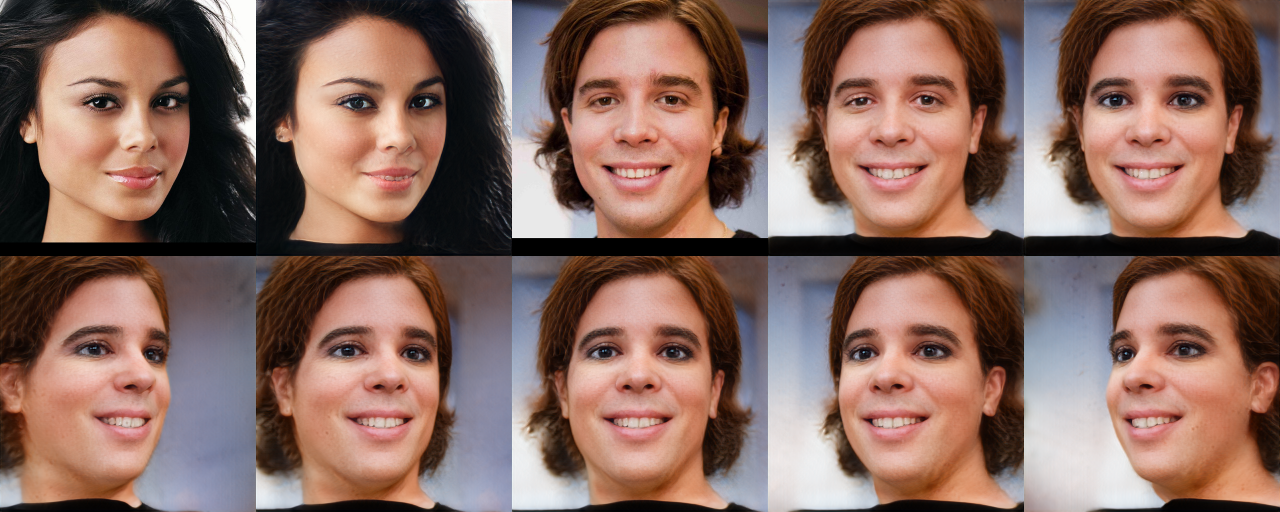

In [17]:
"""
Row 1 : Src original, src encoded, dst original, dst encoded, edited image rendered from original pose
Row 2 : Edited from novel poses
"""
edit_pipeline.edit_demo(input_base_dir='example', src_name='79.png', dst_name='40.png', edit_label='eyes', runtime_optim=False)

Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers


100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


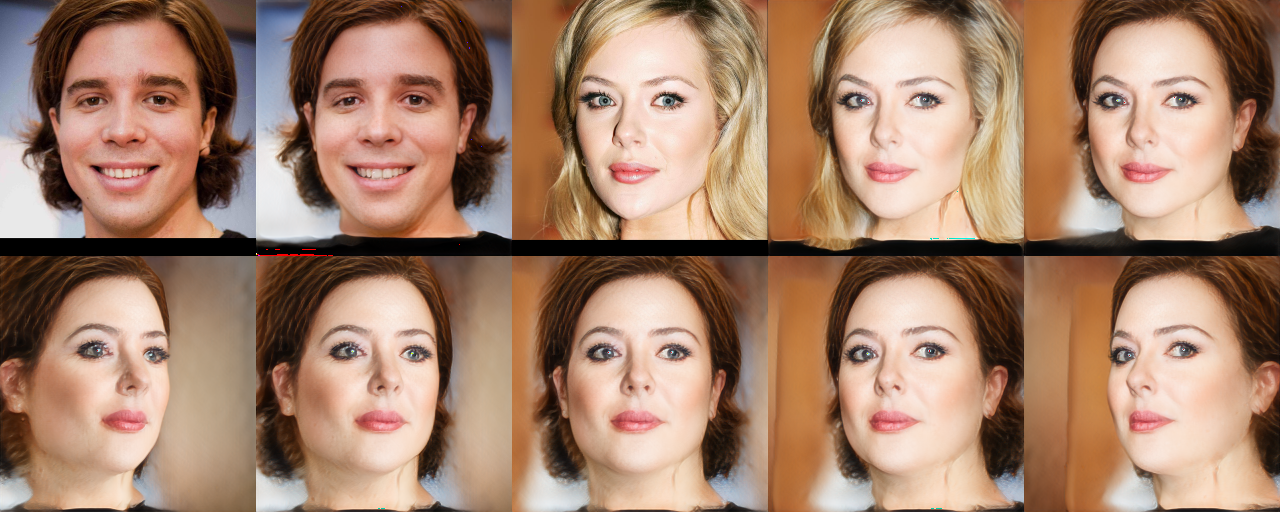

In [8]:
edit_pipeline.edit_demo(input_base_dir='example', src_name='40.png', dst_name='68.png', edit_label='hair', runtime_optim=True)

Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


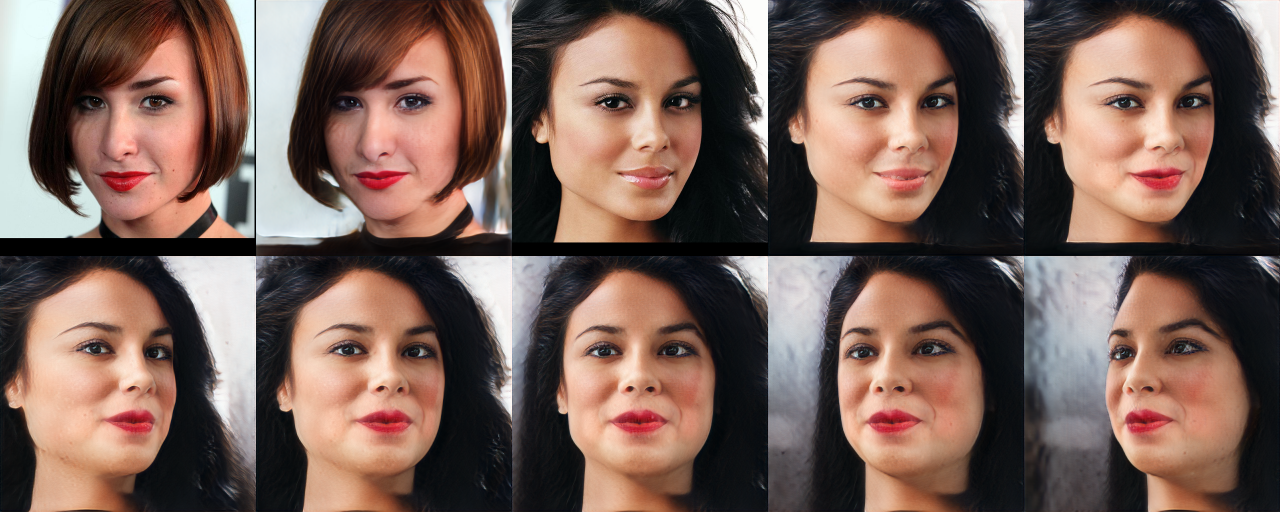

In [19]:
edit_pipeline.edit_demo(input_base_dir='example', src_name='83.png', dst_name='79.png', edit_label='mouth', runtime_optim=True)

Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


Ranger optimizer loaded. 
Gradient Centralization usage = True
GC applied to both conv and fc layers


100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


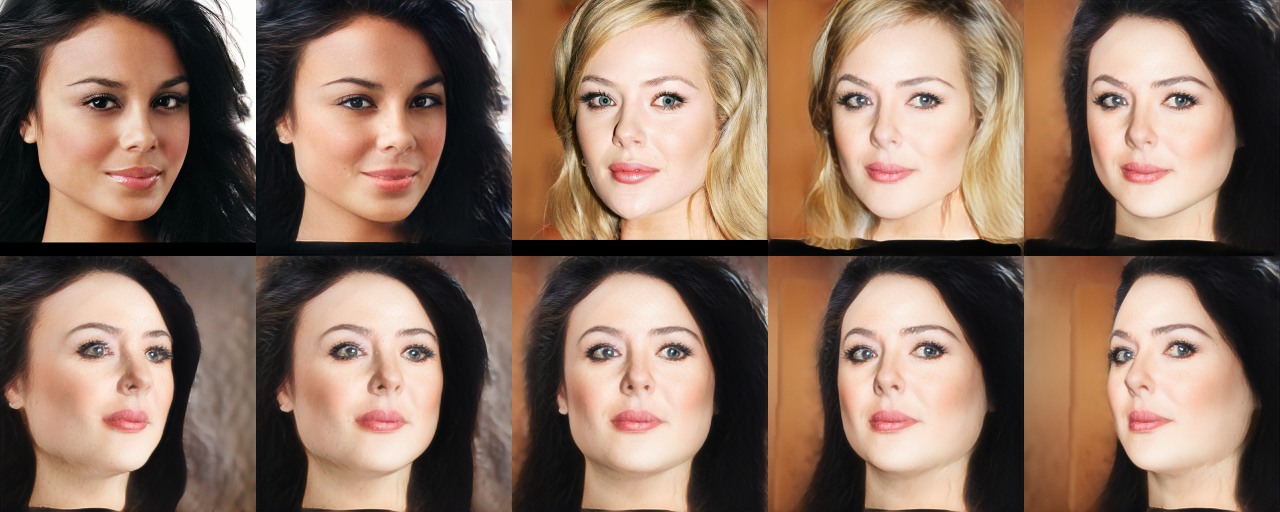

In [28]:
edit_pipeline.edit_demo(input_base_dir='example', src_name='79.png', dst_name='68.png', edit_label='hair', runtime_optim=True)

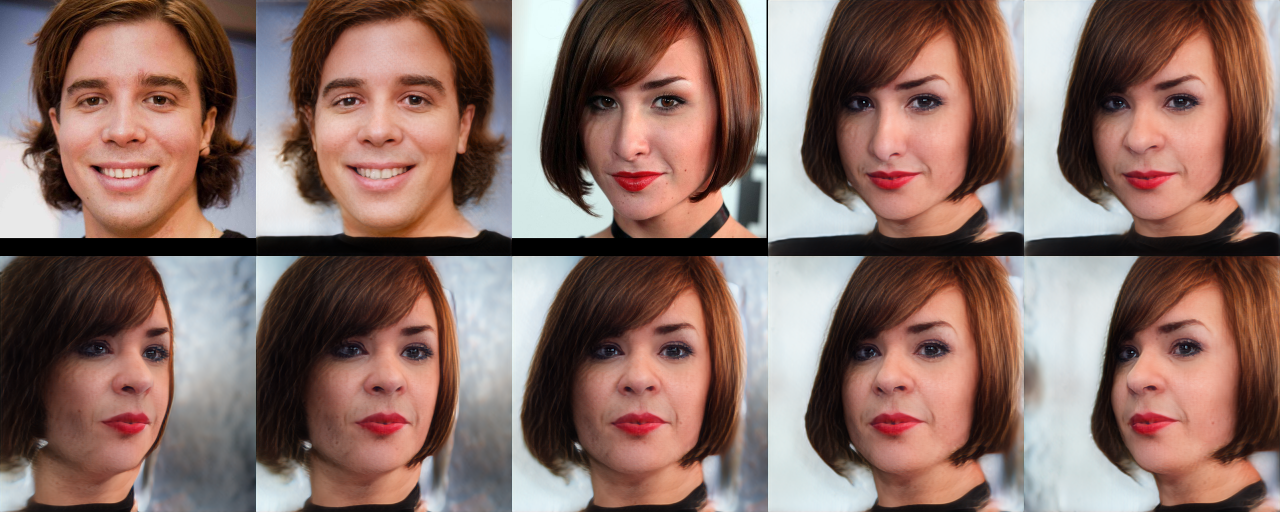

In [26]:
edit_pipeline.edit_demo(input_base_dir='example', src_name='40.png', dst_name='83.png', edit_label='nose', runtime_optim=False)